In [111]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import cv2
from sklearn.model_selection import train_test_split

In [112]:

c=[]
testRatio = 0.2
valRatio = 0.2
X_train=[]
X_test=[]
y_test=[]
y_train=[]
X_validation=[]
y_validation=[]
path=r"C:\Users\Prahlad\Desktop\Mini Project\PICS"
folders=os.listdir(path)
x=len(folders)
for i in range(0,x):
    pics=os.listdir(path+"/"+folders[i])
    images=[]
    classNo=[]
    for j in pics:
        img=cv2.imread(path+"/"+folders[i]+"/"+j)
        images.append(img)
        classNo.append(chr(65+i))
    a,b,c,d = train_test_split(images,classNo,test_size=testRatio)
    a,e,c,f = train_test_split(a,c,test_size=valRatio)
    X_test+=b
    X_train+=a
    y_test+=d
    y_train+=c
    X_validation+=e
    y_validation+=f

In [113]:

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(X_validation))
x={}
for i in y_train:
    if i in x:
        x[i]+=1
    else:
        x[i]=1
print(sorted(x.items(),key=lambda i:(i[1],i[0])))
x={}
for i in y_test:
    if i in x:
        x[i]+=1
    else:
        x[i]=1
print(sorted(x.items(),key=lambda i:(i[1],i[0])))
x={}
for i in y_validation:
    if i in x:
        x[i]+=1
    else:
        x[i]=1
print(sorted(x.items(),key=lambda i:(i[1],i[0])))

440
440
156
130
[('B', 16), ('R', 16), ('S', 16), ('C', 17), ('D', 17), ('E', 17), ('F', 17), ('G', 17), ('H', 17), ('I', 17), ('J', 17), ('K', 17), ('L', 17), ('M', 17), ('N', 17), ('O', 17), ('P', 17), ('Q', 17), ('T', 17), ('U', 17), ('V', 17), ('W', 17), ('X', 17), ('Y', 17), ('Z', 17), ('A', 18)]
[('A', 6), ('B', 6), ('C', 6), ('D', 6), ('E', 6), ('F', 6), ('G', 6), ('H', 6), ('I', 6), ('J', 6), ('K', 6), ('L', 6), ('M', 6), ('N', 6), ('O', 6), ('P', 6), ('Q', 6), ('R', 6), ('S', 6), ('T', 6), ('U', 6), ('V', 6), ('W', 6), ('X', 6), ('Y', 6), ('Z', 6)]
[('A', 5), ('B', 5), ('C', 5), ('D', 5), ('E', 5), ('F', 5), ('G', 5), ('H', 5), ('I', 5), ('J', 5), ('K', 5), ('L', 5), ('M', 5), ('N', 5), ('O', 5), ('P', 5), ('Q', 5), ('R', 5), ('S', 5), ('T', 5), ('U', 5), ('V', 5), ('W', 5), ('X', 5), ('Y', 5), ('Z', 5)]


In [114]:
def grey(x,s,newImage):
    a=np.zeros(s[0]*s[1])
    k=0
    for i in range(s[0]):
        for j in range(s[1]):
            gray=(x[i][j][0]+x[i][j][1]+x[i][j][2])/3
            newImage[i][j][0]=gray
            a[k]=gray
            k+=1
    meanValue=np.mean(a)
    return newImage,meanValue

In [115]:
def removeBackground(s,newImage,meanValue):
    up,bottom=-1,s[0]
    left,right=s[1],0
    for i in range(s[0]):
        for j in range(s[1]):
            if(newImage[i][j][0]<meanValue):
                newImage[i][j][0]=0
                if up==-1:
                    up=i
                if j<left:
                    left=j
                if j>right:
                    right=j
                if bottom!=i and i<s[0]:
                    bottom=i
            else:
                newImage[i][j][0]=255
    newImage=newImage[up:bottom+1,left:right+1]
    return newImage

In [116]:
def findCentroid(s,newImage):
    cx=[]
    cy=[]
    for i in range(s[0]):
        for j in range(s[1]):
            if newImage[i][j][0]==0:
                cx.append(i)
                cy.append(j)
    c1=round(sum(cx)/len(cx))
    c2=round(sum(cy)/len(cy))
    return c1,c2

In [117]:
def func_peri(p1,p2,c):
    x=math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    y=math.sqrt((p1[0]-c[0])**2+(p1[1]-c[1])**2)
    z=math.sqrt((c[0]-p2[0])**2+(c[1]-p2[1])**2)
    s=(x+y+z)
    return s

In [118]:
def horizontalFeatureExtraction(s,newImage):
    areas=[]
    peri=[]
    for i in range(s[0]):
        p1=[-1,-1]
        p2=[-1,-1]
        for j in range(s[1]):
            if newImage[i][j][0]==0:
                if p1[1]==-1:
                    p1[0]=i
                    p1[1]=j
                if p2[0]==-1:
                    p2[0]=i
                    p2[1]=j
                else:
                    if p2[1]!=-1 and p2[1]<j: 
                        p2[0]=i
                        p2[1]=j
        peri.append(func_peri(p1,p2,c))
    return peri

In [119]:
def verticalFeatureExtraction(s,newImage):
    areas=[]
    peri=[]
    for j in range(s[1]):
        p1=[-1,-1]
        p2=[-1,-1]
        for i in range(s[0]-1,-1,-1):
            if newImage[i][j][0]==0:
                if p1[1]==-1:
                    p1[0]=i
                    p1[1]=j
                if p2[0]==-1:
                    p2[0]=i
                    p2[1]=j
                else:
                    if p2[0]!=-1 and p2[0]>i: 
                        p2[0]=i
                        p2[1]=j
        peri.append(func_peri(p1,p2,c))
    return peri

In [120]:
def boundryExtraction(s,newImage):
    boundry=[]
    for i in range(s[0]):
        k=1
        for j in range(s[1]-1):
            if newImage[i][j][0]==0 and newImage[i][j+1][0]!=0:
                k+=1 
        if newImage[i][s[1]-1][0]==0:
            k+=1
        boundry.append(k)
    return boundry

In [121]:
def normalize(features,maximumValue):
    for i in range(len(features)):
        a=features[i]/maximumValue
        if a>=0 and a<=0.1:
            features[i]=1
        if a>0.1 and a<=0.2:
            features[i]=2
        if a>0.2 and a<=0.3:
            features[i]=3
        if a>0.3 and a<=0.4:
            features[i]=4
        if a>0.4 and a<=0.5:
            features[i]=5
        if a>0.5 and a<=0.6:
            features[i]=6
        if a>0.6 and a<=0.7:
            features[i]=7
        if a>0.7 and a<=0.8:
            features[i]=8
        if a>0.8 and a<=0.9:
            features[i]=9
        if a>0.9 and a<=1.0:
            features[i]=10
    return features
            

<ipython-input-114-3c580d9adc68>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  gray=(x[i][j][0]+x[i][j][1]+x[i][j][2])/3


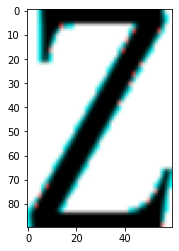

In [122]:
k=0
outfile=open("results1.csv","w")
features={}
for i in X_train:
    x=i
    s=x.shape
    #newImage=np.zeros((s[0],s[1]),dtype=int)
    newImage=i
    newImage,meanvalue=grey(x,s,newImage)
    newImage=removeBackground(s,newImage,meanvalue)
    newImage=cv2.resize(newImage,(60,90))
    s=newImage.shape
    c1,c2=findCentroid(s,newImage)
    c=[c1,c2]
    p1=horizontalFeatureExtraction(s,newImage)
    p2=verticalFeatureExtraction(s,newImage)
    #boundry=boundryExtraction(s,newImage)
    """f=f1+f2
    a=max(f1)
    b=max(f2)
    if a>b:
        f=normalize(f,a)
    else:
        f=normalize(f,b)"""
    p=p1+p2
    a=max(p1)
    b=max(p2)
    if a>b:
        p=normalize(p,a)
    else:
        p=normalize(p,b)
    #f=f+p#+boundry
    row_string='{},{}'.format(y_train[k],p)
    outfile.write(row_string)
    outfile.write('\n')
    k+=1
    plt.imshow(newImage)
outfile.close()

In [123]:
def chi_square(list1,list2):
    list_both=[i+j for i,j in zip(list1,list2)]
    total_list1=sum(list1)
    total_list2=sum(list2)
    total_both=sum(list_both)
    prob1=total_list1/total_both
    prob2=total_list2/total_both
    result=[]
    for i in range(len(list1)):
        x=list_both[i]*prob1
        y=list1[i]-x
        y=y**2
        result.append(round((y/list1[i]),4))
    for i in range(len(list2)):
        x=list_both[i]*prob2
        y=list2[i]-x
        y=y**2
        result.append(round((y/list2[i]),4))
    chi_square=sum(result)
    return round(chi_square,4)

In [124]:
k=0
result=[]
result_features={}
for i in X_validation:
    var1=[]
    comparision=[]
    x=i
    s=x.shape
    newImage=i
    newImage,meanvalue=grey(x,s,newImage)
    newImage=removeBackground(s,newImage,meanvalue)
    newImage=cv2.resize(newImage,(60,90))
    s=newImage.shape
    c1,c2=findCentroid(s,newImage)
    c=[c1,c2]
    p1=horizontalFeatureExtraction(s,newImage)
    p2=verticalFeatureExtraction(s,newImage)
    #boundry=boundryExtraction(s,newImage)
    """f=f1+f2
    a=max(f1)
    b=max(f2)
    if a>b:
        f=normalize(f,a)
    else:
        f=normalize(f,b)"""
    p=p1+p2
    a=max(p1)
    b=max(p2)
    if a>b:
        p=normalize(p,a)
    else:
        p=normalize(p,b)
    #f=f+p#+boundry
    file=open("results1.csv","r")
    lines=file.readlines()
    for i in lines:
        j=0
        check_list=(list(map(int,(i[2:].strip('][\n').split(",")))))
        comparision.append(chi_square(p,check_list))
        var1.append(i[0])
    v=(min(comparision))
    result.append(var1[comparision.index(v)])
    file1=open("results1.csv","a")
    if(y_validation[k]!=result[k]):
        print("hii")
        row_string='{},{}'.format(y_validation[k],p)
        file1.write(row_string)
        file1.write('\n')
    k+=1
per=0
print(y_validation)
print(result)
file.close()
file1.close()
for i in range(len(result)):
    if(y_validation[i]==result[i]):
        per+=1
    print(y_validation[i],result[i])
print(per/len(result))

<ipython-input-114-3c580d9adc68>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  gray=(x[i][j][0]+x[i][j][1]+x[i][j][2])/3


hii
hii
hii
hii
hii
hii
hii
hii
hii
hii
['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'H', 'I', 'I', 'I', 'I', 'I', 'J', 'J', 'J', 'J', 'J', 'K', 'K', 'K', 'K', 'K', 'L', 'L', 'L', 'L', 'L', 'M', 'M', 'M', 'M', 'M', 'N', 'N', 'N', 'N', 'N', 'O', 'O', 'O', 'O', 'O', 'P', 'P', 'P', 'P', 'P', 'Q', 'Q', 'Q', 'Q', 'Q', 'R', 'R', 'R', 'R', 'R', 'S', 'S', 'S', 'S', 'S', 'T', 'T', 'T', 'T', 'T', 'U', 'U', 'U', 'U', 'U', 'V', 'V', 'V', 'V', 'V', 'W', 'W', 'W', 'W', 'W', 'X', 'X', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'Y', 'Y', 'Z', 'Z', 'Z', 'Z', 'Z']
['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'I', 'E', 'I', 'Z', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'G', 'Q', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'H', 'I', 'I', 'I', 'I', 'I', 'J', 'J', 'J', 'J', 'J', 'X', 'K', 'K', 'K', 'K', 'L', 'L', 'L', 'L', 'L', 'N', 'M'

In [125]:
k=0
result=[]
result_features={}
for i in X_test:
    var1=[]
    comparision=[]
    x=i
    k=0
    s=x.shape
    newImage=i
    newImage,meanvalue=grey(x,s,newImage)
    newImage=removeBackground(s,newImage,meanvalue)
    newImage=cv2.resize(newImage,(60,90))
    s=newImage.shape
    c1,c2=findCentroid(s,newImage)
    c=[c1,c2]
    p1=horizontalFeatureExtraction(s,newImage)
    p2=verticalFeatureExtraction(s,newImage)
    #boundry=boundryExtraction(s,newImage)
    """f=f1+f2
    a=max(f1)
    b=max(f2)
    if a>b:
        f=normalize(f,a)
    else:
        f=normalize(f,b)"""
    p=p1+p2
    a=max(p1)
    b=max(p2)
    if a>b:
        p=normalize(p,a)
    else:
        p=normalize(p,b)
    #f=f+p#+boundry
    file=open("results1.csv","r")
    lines=file.readlines()
    for i in lines:
        j=0
        check_list=(list(map(int,(i[2:].strip('][\n').split(",")))))
        comparision.append(chi_square(p,check_list))
        var1.append(i[0])
    v=(min(comparision))
    result.append(var1[comparision.index(v)])
per=0
file.close()
for i in range(len(result)):
    if(y_test[i]==result[i]):
        per+=1
    print(y_test[i],result[i])
print(per/len(result))

<ipython-input-114-3c580d9adc68>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  gray=(x[i][j][0]+x[i][j][1]+x[i][j][2])/3


A A
A A
A A
A A
A A
A A
B I
B B
B B
B B
B B
B B
C C
C C
C C
C C
C C
C C
D O
D D
D D
D D
D D
D D
E E
E E
E E
E E
E E
E E
F F
F F
F F
F F
F F
F F
G G
G G
G G
G G
G C
G G
H H
H N
H N
H H
H H
H N
I I
I A
I Z
I O
I I
I I
J J
J J
J J
J J
J J
J J
K K
K K
K X
K K
K K
K K
L L
L L
L L
L L
L L
L L
M M
M M
M M
M M
M M
M L
N N
N N
N N
N N
N N
N N
O O
O O
O O
O O
O O
O O
P P
P P
P P
P P
P P
P P
Q Q
Q Q
Q Q
Q Q
Q Q
Q Q
R R
R R
R R
R R
R R
R R
S S
S S
S C
S S
S C
S S
T W
T T
T T
T Y
T T
T T
U H
U U
U U
U U
U U
U U
V V
V V
V V
V V
V V
V V
W W
W W
W W
W W
W W
W W
X X
X X
X X
X X
X X
X X
Y Y
Y Y
Y Y
Y Y
Y Y
Y Y
Z Z
Z Z
Z Z
Z Z
Z Z
Z Z
0.8974358974358975
